In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import math

from mplsoccer import PyPizza, add_image, FontManager
import matplotlib.pyplot as plt

In [43]:
#import csv of premier league defensive stats from fbref. I have uploaded the data but I changed the column names in the csv prior.
df = pd.read_csv('pizza.csv')

#when you first read in the csv from fbref, you'll notice the player names are kind of weird. This code splits them on the \
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [29]:
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,Tkls vs Dribbles,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Intreceptions,Tkl+Int,Clearances,Errors
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,2.16,1.16,1.16,0.66,3.53,7.97,4.38,1.22,2.69,1.75,3.91,2.19,0.00
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,0.70,0.40,0.09,0.57,3.83,1.67,5.81,7.14,1.10,0.44,1.15,0.66,0.00
2,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,20.3,3.74,2.12,1.38,0.84,6.65,11.40,5.71,2.71,1.67,1.87,5.62,1.58,0.05
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,1.80,0.99,0.90,0.72,3.29,4.82,3.15,1.31,1.62,2.21,4.01,3.65,0.05
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,1.46,0.49,0.39,0.29,2.23,2.52,3.59,0.68,1.17,1.75,3.20,3.01,0.00


In [30]:
# only defenders and only those with more than 12 90's played 
#(This data is from about week 35 so 12 90s will help us eliminate most outliers)
df = df.loc[(df['Pos']=='DF') & (df['90s']>15)]
#recheck the dataframe
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,Tkls vs Dribbles,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Intreceptions,Tkl+Int,Clearances,Errors
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,2.16,1.16,1.16,0.66,3.53,7.97,4.38,1.22,2.69,1.75,3.91,2.19,0.00
2,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,20.3,3.74,2.12,1.38,0.84,6.65,11.40,5.71,2.71,1.67,1.87,5.62,1.58,0.05
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,1.80,0.99,0.90,0.72,3.29,4.82,3.15,1.31,1.62,2.21,4.01,3.65,0.05
7,Trent Alexander-Arnold,eng ENG,DF,Liverpool,22,1998,31.7,1.39,0.76,0.73,1.14,3.06,3.60,2.78,2.71,1.23,2.40,3.79,1.36,0.03
13,Marcos Alonso,es ESP,DF,Chelsea,30,1990,24.1,1.87,1.16,0.58,0.75,3.53,5.02,4.19,3.24,1.62,2.74,4.61,2.28,0.00


In [31]:
# We now need to drop all of the columns that we don't want. 
# These are all the columns that won't be used included in the pizza plot
# These are just the ones I need to drop you may need to drop more or less depending on what you want to compare
df = df.drop(['Nation','Pos','Squad','Age','Born'],axis=1).reset_index()

In [32]:
df.head()

,index,Player,90s,Tackles,Tkls Won,Tkls vs Dribbles,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Intreceptions,Tkl+Int,Clearances,Errors
0,0,Max Aarons,32.0,2.16,1.16,1.16,0.66,3.53,7.97,4.38,1.22,2.69,1.75,3.91,2.19,0.00
1,2,Rayan Aït Nouri,20.3,3.74,2.12,1.38,0.84,6.65,11.40,5.71,2.71,1.67,1.87,5.62,1.58,0.05
2,3,Kristoffer Ajer,22.2,1.80,0.99,0.90,0.72,3.29,4.82,3.15,1.31,1.62,2.21,4.01,3.65,0.05
3,7,Trent Alexander-Arnold,31.7,1.39,0.76,0.73,1.14,3.06,3.60,2.78,2.71,1.23,2.40,3.79,1.36,0.03
4,13,Marcos Alonso,24.1,1.87,1.16,0.58,0.75,3.53,5.02,4.19,3.24,1.62,2.74,4.61,2.28,0.00


In [33]:
#Create a parameter list
params = list(df.columns)
params

['index',
 'Player',
 '90s',
 'Tackles',
 'Tkls Won',
 'Tkls vs Dribbles',
 'Dribbled Past',
 '  Successful Pressures',
 'Def 3rd Press',
 'Mid 3rd Press',
 'Att 3rd Press',
 'Blocks',
 'Intreceptions',
 'Tkl+Int',
 'Clearances',
 'Errors']

In [34]:
#drop the first 3 list item becuase we will not be using player,index, or 90s as a comparison metric
params = params[2:]
params

['90s',
 'Tackles',
 'Tkls Won',
 'Tkls vs Dribbles',
 'Dribbled Past',
 '  Successful Pressures',
 'Def 3rd Press',
 'Mid 3rd Press',
 'Att 3rd Press',
 'Blocks',
 'Intreceptions',
 'Tkl+Int',
 'Clearances',
 'Errors']

In [35]:
# Now we filter the df for the player we want. We will look at ruben dias. 
# The player needs to be spelled exactly the same way as it is in the data. Accents and everything.
player = df.loc[df['Player']=='Marc Cucurella'].reset_index()
player = list(player.loc[0])
print(player)

[24, 101, 'Marc Cucurella', 34.3, 2.57, 1.81, 1.4, 0.85, 5.86, 6.27, 6.36, 2.94, 2.1, 2.1, 4.66, 1.92, 0.0]


In [36]:
df.Player.values

array(['Max Aarons', 'Rayan Aït Nouri', 'Kristoffer Ajer',
       'Trent Alexander-Arnold', 'Marcos Alonso', 'Daniel Amartey',
       'Joachim Andersen', 'Luke Ayling', 'César Azpilicueta',
       'Jan Bednarek', 'Dan Burn', 'João Cancelo', 'Sergi Canós',
       'Matty Cash', 'Timothy Castagne', 'Craig Cathcart',
       'Trevoh Chalobah', 'Andreas Christensen', 'Conor Coady',
       'Séamus Coleman', 'Nathan Collins', 'Liam Cooper',
       'Vladimír Coufal', 'Aaron Cresswell', 'Marc Cucurella',
       'Diogo Dalot', 'Ben Davies', 'Craig Dawson', 'Rúben Dias',
       'Eric Dier', 'Virgil van Dijk', 'Gabriel Dos Santos',
       'Shane Duffy', 'Lewis Dunk', 'Emerson', 'Kiko Femenía',
       'Junior Firpo', 'Ben Gibson', 'Ben Godfrey', 'Marc Guéhi',
       'Grant Hanley', 'Rico Henry', 'Mason Holgate', 'Reece James',
       'Pontus Jansson', 'Ben Johnson', 'Hassane Kamara', 'Michael Keane',
       'Max Kilman', 'Ezri Konsa', 'Emil Krafth', 'Aymeric Laporte',
       'Jamaal Lascelles', 'Vic

In [37]:
# the length of our players in longer than the length of the params. we need to drop the first 3 player list items
print(len(player),print(len(params)))
player = player[3:]
print(len(player),print(len(params)))

14
17 None
14
14 None


In [38]:
# now that we have the player scores, we need to calculate the percentile values with scipy stats.
# I am doing this because I do not know the percentile beforehand and only have the raw numbers
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(df[params[x]],player[x])))

In [39]:
round(stats.percentileofscore(df[params[0]],player[0]))

92

In [40]:
for n,i in enumerate(values):
    if i == 100:
        values[n] = 99

In [41]:
# color for the slices and text
# slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
# text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 


baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    other_circle_ls="-."            # linestyle for other circles
)

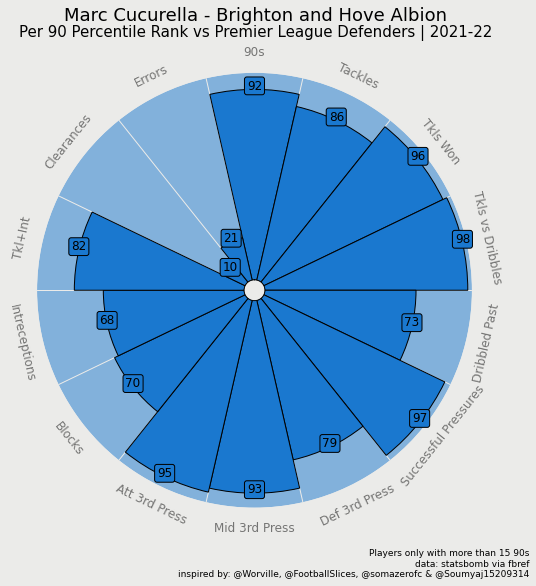

In [42]:
# plot pizza
fig, ax = baker.make_pizza(
    values,              # list of values
    color_blank_space="same",
    figsize=(8, 8),      # adjust figsize according to your need
    param_location=110,  # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=2, linewidth=1
    ),                   # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=12,
        va="center", alpha=.5
    ),                   # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    )                    # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.97, "Marc Cucurella - Brighton and Hove Albion", size=18,
    ha="center", color="#000000"
)
# add subtitle
fig.text(
    0.515, 0.942,
    "Per 90 Percentile Rank vs Premier League Defenders | 2021-22",
    size=15,
    ha="center", color="#000000"
)

# add credits
notes = 'Players only with more than 15 90s'
CREDIT_1 = "data: statsbomb via fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.005, f"{notes}\n{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)

plt.savefig('pizza.png',dpi=500,bbox_inches = 'tight')


In [44]:
df.head()

,Player,Nation,Pos,Squad,Age,Born,90s,Tackles,Tkls Won,Tkls vs Dribbles,Dribbled Past,Successful Pressures,Def 3rd Press,Mid 3rd Press,Att 3rd Press,Blocks,Intreceptions,Tkl+Int,Clearances,Errors
0,Max Aarons,eng ENG,DF,Norwich City,21,2000,32.0,2.16,1.16,1.16,0.66,3.53,7.97,4.38,1.22,2.69,1.75,3.91,2.19,0.00
1,Che Adams,sct SCO,FW,Southampton,25,1996,22.7,0.70,0.40,0.09,0.57,3.83,1.67,5.81,7.14,1.10,0.44,1.15,0.66,0.00
2,Rayan Aït Nouri,fr FRA,DF,Wolves,20,2001,20.3,3.74,2.12,1.38,0.84,6.65,11.40,5.71,2.71,1.67,1.87,5.62,1.58,0.05
3,Kristoffer Ajer,no NOR,DF,Brentford,23,1998,22.2,1.80,0.99,0.90,0.72,3.29,4.82,3.15,1.31,1.62,2.21,4.01,3.65,0.05
4,Nathan Aké,nl NED,DF,Manchester City,26,1995,10.3,1.46,0.49,0.39,0.29,2.23,2.52,3.59,0.68,1.17,1.75,3.20,3.01,0.00


In [ ]:
for i in len(df):
    if df.loc[df['Squad']]